# Tutorial on the use of Python for tasks in Bio-Medical research

__Tutorial plan__

* Part 1. Introduction to Computer Vision
* Part 2. Practical task: trajectory and heat map of the movement of a laboratory animal in the _"Open Field"_ test system


__Useful links__
* [OpenCV Tutorials](https://docs.opencv.org/4.x/d9/df8/tutorial_root.html)
* [Hannah Weller. Color Spaces](https://cran.r-project.org/web/packages/colordistance/vignettes/color-spaces.html)
* [OpenCV Python Tutorial](https://www.geeksforgeeks.org/opencv-python-tutorial/) 
* [OpenCV's face detection](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)


__Libraries__

* library [numpy](https://numpy.org/)
* library [matplotlib](https://matplotlib.org/)
* library[pandas](https://pandas.pydata.org/)
* library [seaborn](https://seaborn.pydata.org/)
* library [scikit-learn](https://scikit-learn.org/stable/index.html)
* library [OpenCV](https://opencv.org/)
* library [scikit-image](https://scikit-image.org/)

## Part 1.Introduction to Computer Vision

In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import os
import json
import numpy as np
import pandas as pd
import cv2
print(cv2.__version__)

4.6.0


In [2]:
# Load an image from the file
img = cv2.imread("images/window.jpg")

In [3]:
img.shape

(960, 1280, 3)

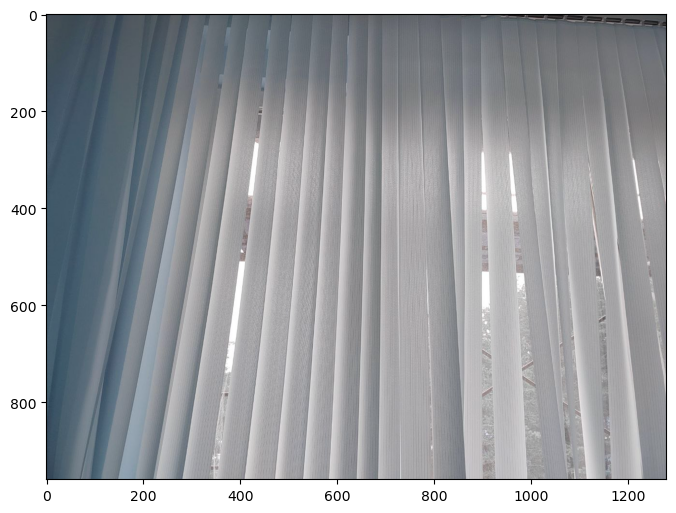

In [4]:
# Image display
plt.figure(figsize = (8, 8))
plt.imshow(img)       
plt.show()

 ⚠️!!! In OpenCV, the default channel sequence is __BGR__ instead of _RGB_

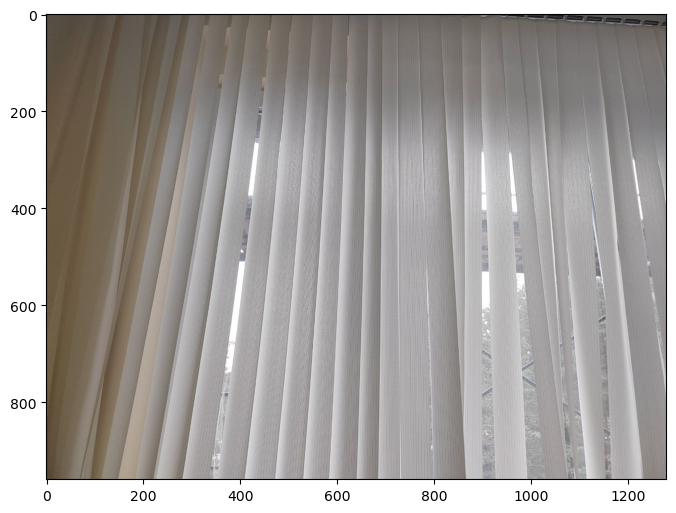

In [5]:
# Converting from one color space to another
plt.figure(figsize = (8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
plt.show()

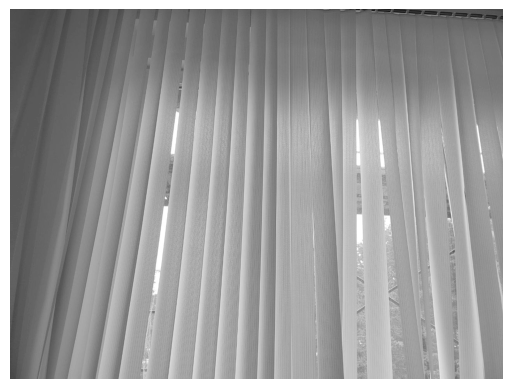

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray') 
plt.axis("off")
plt.show()

In [7]:
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 3686400
- Shape/Dimensions: (960, 1280, 3)


__Draw a red square, for example, in Paint__

⚠️!!! In OpenCV, the default channel sequence is __BGR__ instead of _RGB_

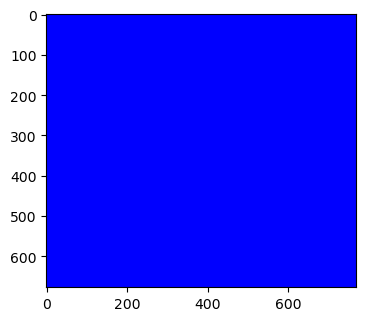

In [8]:
img_red = cv2.imread("images/red.png")
# Отображение:
plt.figure(figsize = (4, 4))
plt.imshow(img_red)       
plt.show()

In [9]:
#print(img_red)

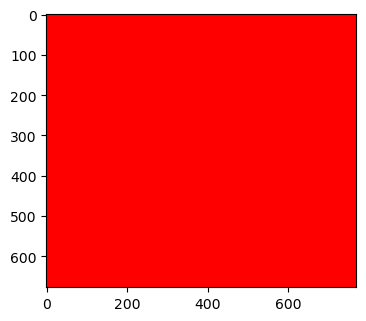

In [10]:
plt.figure(figsize = (4, 4))
plt.imshow(cv2.cvtColor(img_red , cv2.COLOR_BGR2RGB))    
plt.show()

✍️ __НDraw a number in Paint 25x25 px or 16x16 px__

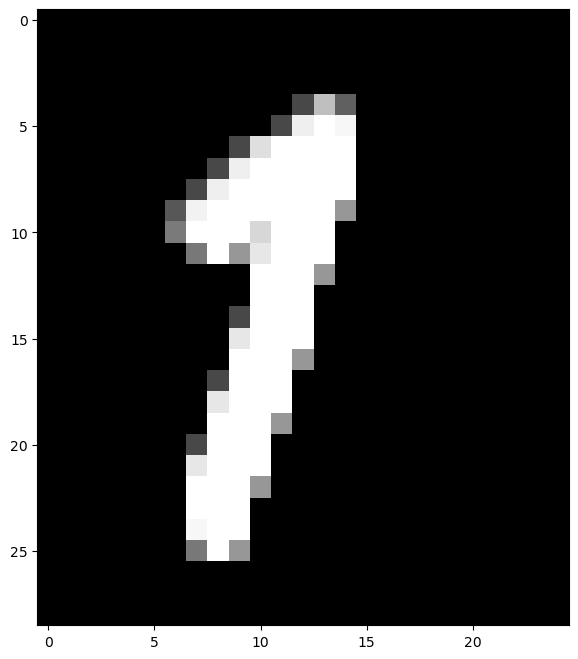

In [11]:
img3 = cv2.imread("images/digit_1.png")
# Отображение:
plt.figure(figsize = (8, 8))
plt.imshow(img3)       
plt.show()

In [12]:
img3.shape

(29, 25, 3)

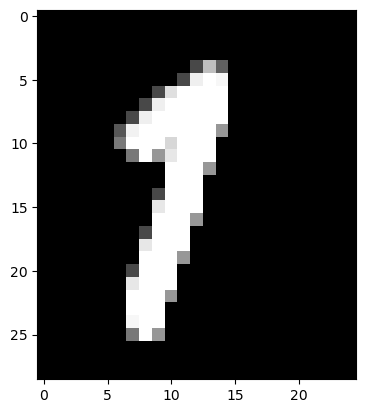

In [13]:
gray_image1 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image1, cmap='gray') 
#plt.axis("off")
plt.show()

In [14]:
gray_image1.shape

(29, 25)

In [15]:
print(gray_image1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  72 191  96   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  72 239 255 247   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  72 223 255 255 255 255   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 239 255 255 255 255 255   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 239 255 255 255 255 255 255   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  87 242 255 255 255 255 255 2

__Resizing an Image__

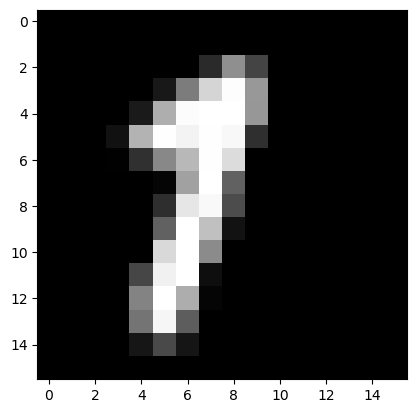

In [16]:
resized = cv2.resize(gray_image1, (16,16), interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray') 
#plt.axis("off")
plt.show()

__Two-dimensional array as an image__

🎗️ [Array creation (NumPy)](https://numpy.org/doc/stable/user/basics.creation.html)


In [17]:
img_matrix = np.eye(8)
print(img_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


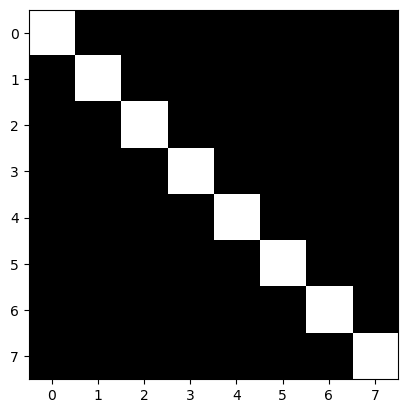

In [18]:
plt.imshow(img_matrix, cmap='gray') 
#plt.axis("off")
plt.show()

960
480


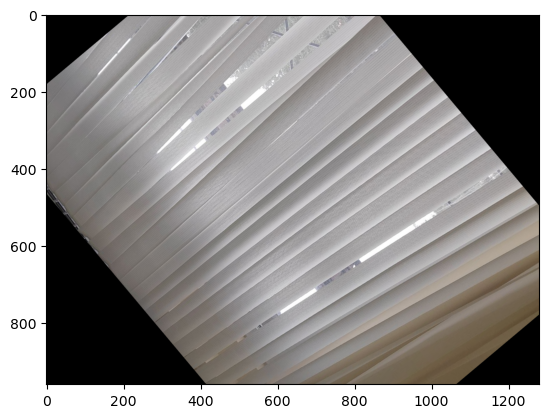

In [19]:
(h, w, d) = img.shape
print (h)
print (h // 2) ## частное от деления НА 2  нацело
(h, w, d) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 130, 1.0)

rotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))   
plt.show()

__Image Filtering in OpenCV__


* [Image Filtering: doc OpenCV](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html)
* [Савченко А.В. Цифровая обработка изображений. Лекция (на русском)}](https://nnov.hse.ru/data/2017/08/26/1174067833/lecture2.pdf)
* [Stanford course: EE368/CS232 Digital Image Processing](https://web.stanford.edu/class/ee368/handouts.html)

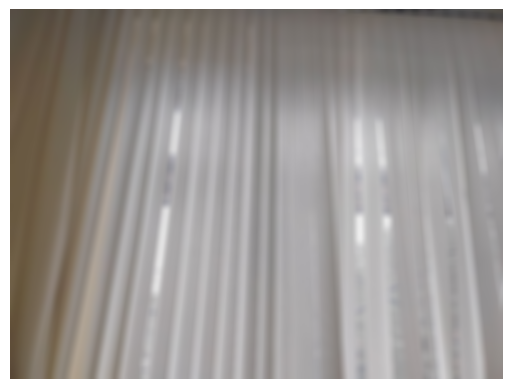

In [20]:
img_blurred = cv2.GaussianBlur(img, (25, 25), 10)
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)) 
plt.axis("off")

plt.show()

__OpenCV — Morphological Operations__

* erode() - this maximizing operation causes bright regions within an image to "grow"
* dilate() - bright areas of the image get thinner, whereas the dark zones gets bigger.
* morphologyEx() //MORPH_OPEN, MORPH_CLOSE 

More see [page documentation](https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html)

In [21]:
# let's set the kernel
kernel = np.ones((3, 3), 'uint8')
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

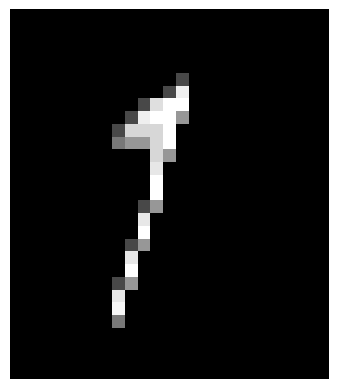

In [22]:
erode_img = cv2.erode(gray_image1, kernel, iterations=1)
plt.imshow(erode_img , cmap='gray') 
plt.axis("off")
plt.show()

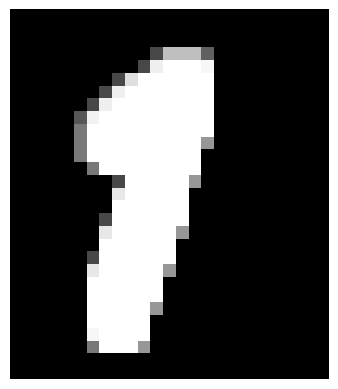

In [23]:
dilate_img = cv2.dilate(gray_image1, kernel, iterations=1)
plt.imshow(dilate_img, cmap='gray') 
plt.axis("off")
plt.show()

### Understanding convolutional neural networks

[Paper: Understanding convolutional neural networks through visualizations in PyTorch](https://sudonull.com/post/3260-Understanding-convolutional-neural-networks-through-visualizations-in-PyTorch)

__Sobel filter__

![](images/sobel.png)

In [24]:
sobel_y = np.array([[-1,-2, -1],
                    [0,0,0],
                    [1,2,1]])
print(sobel_y)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


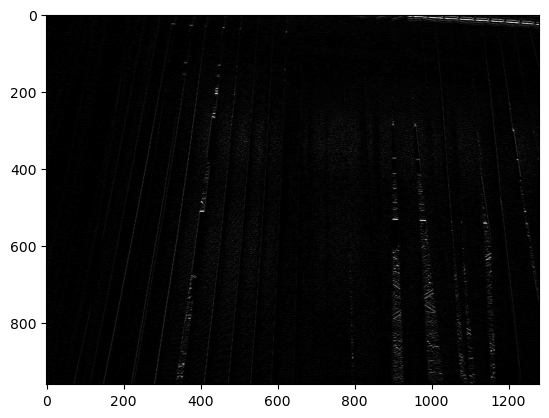

In [25]:
filterd_iamge = cv2.filter2D(gray_image,-1,sobel_y)
plt.imshow(filterd_iamge, cmap='gray')

In [26]:
sobel_x = sobel_y.T
print(sobel_x)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


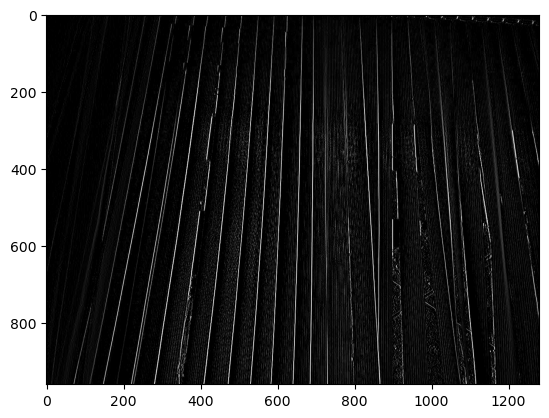

In [27]:
filterd_iamge2 = cv2.filter2D(gray_image,-1,sobel_x)
plt.imshow(filterd_iamge2, cmap='gray')

__Face detection__

In [28]:
ph_haar = cv2.data.haarcascades

In [29]:
# !ls /opt/anaconda3/lib/python3.8/site-packages/cv2/data/
content = os.listdir( ph_haar)
content

['haarcascade_frontalface_alt_tree.xml',
 'haarcascade_upperbody.xml',
 '__pycache__',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_profileface.xml',
 'haarcascade_frontalcatface.xml',
 '__init__.py',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_eye.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_fullbody.xml']

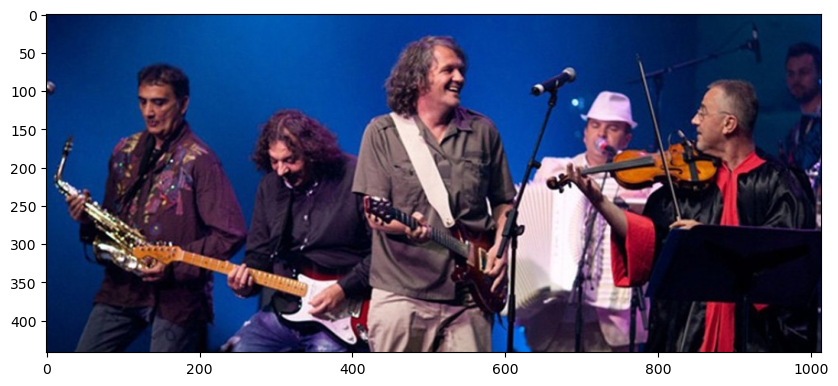

In [30]:
img4 = cv2.imread("images/Emir_Kusturica_The_no_smoking_Orchestra.jpg")
# Отображение:
plt.figure(figsize = (10, 8))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))       
plt.show()

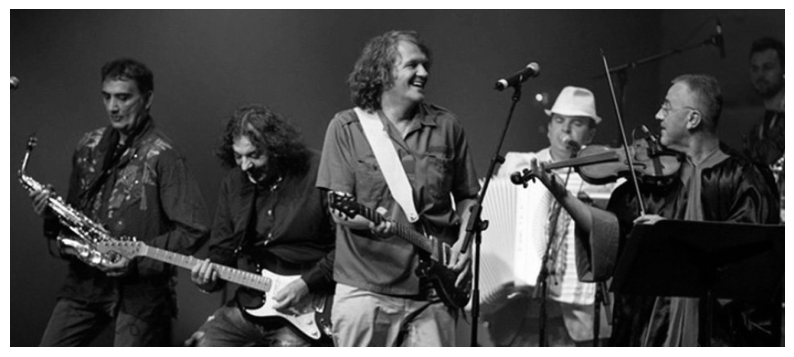

In [31]:
gray_image5 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10, 8))
plt.imshow(gray_image5, cmap='gray') 
plt.axis("off")
plt.show()

In [32]:
# face_cascade = cv2.CascadeClassifier('/opt/anaconda3/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_default.xml')
#face_cascade = cv2.CascadeClassifier( os.path.join(ph_haar, "haarcascade_frontalface_default.xml"))
face_cascade = cv2.CascadeClassifier( os.path.join(ph_haar, "haarcascade_frontalface_alt.xml"))

In [33]:
faces = face_cascade.detectMultiScale(gray_image5, 1.3, 5)

Detect faces: 3


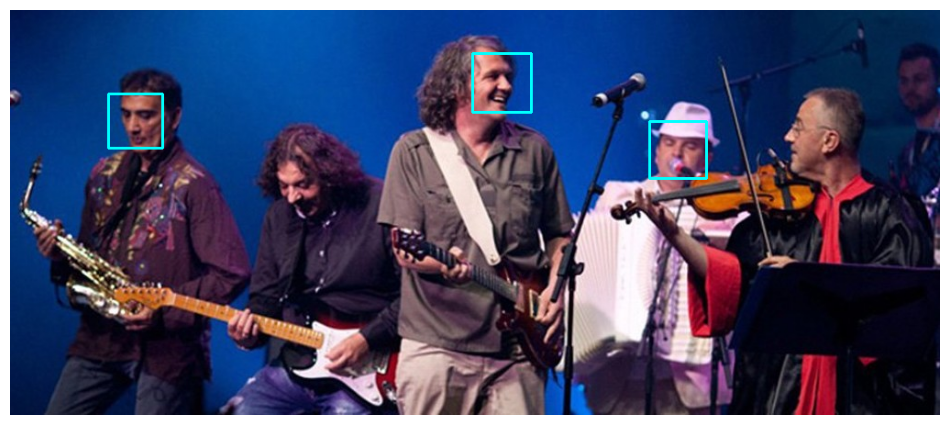

In [34]:
faces_detected = "Detect faces: " + format(len(faces))
print(faces_detected)

# Drawing squares around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img4, (x, y), (x+w, y+h), (255, 255, 0), 2)

plt.figure(figsize = (12, 12))

plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)) 
plt.axis("off")
plt.show()

## Part 2: trajectory and heat map of the movement of a laboratory animal in the _"Open Field"_ test system

### Video file: read

In [35]:
dataset_home ='videos/' 
vname="rat6_13-47-36.mp4"

In [36]:
from IPython.display import Video

Video(os.path.join(dataset_home, vname),  width=500, height=400 )

In [37]:
vdata=[]
vidcap = cv2.VideoCapture( os.path.join(dataset_home, vname))
success,image = vidcap.read()
count = 0
while success:
    if count>49 and count<2550:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        vdata.append(gray) 
    if count==2550:   
        break
    success,image = vidcap.read()
    count += 1


```python
vdata=[]
vidcap = cv2.VideoCapture( os.path.join(dataset_home, vname))
success,image = vidcap.read()
count = 0
while success:
#    if count>49 and count<550:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    vdata.append(gray) 
#    if count==550:   
 #       break
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    #print(count)
    count += 1
```

In [38]:
print(count)

2550


In [39]:
vdata_arr=np.array(vdata)
print(vdata_arr.shape)

(2500, 1024, 1280)


In [40]:
vdata_arr.dtype

dtype('uint8')

__Find the middle image of the video__

In [41]:
def get_median(frames, num=None):
    if num:
        len_frames = len(frames)
        print(len_frames)
        frames = [frames[i] for i in range(0, len_frames, len_frames // num or 1)]
    return np.median(frames, axis=0).astype(dtype=np.uint8)

In [42]:
median_frame=get_median(vdata_arr)

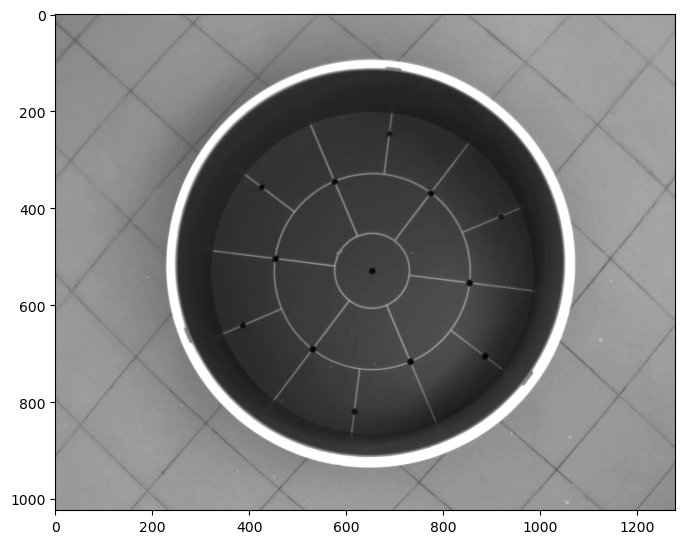

In [43]:
plt.figure(figsize = (8, 8))
plt.imshow(median_frame, cmap='gray')
#plt.axis("off")
plt.show()

__Algorithm: steps__

__Step 1. Difference between each frame and the median image__

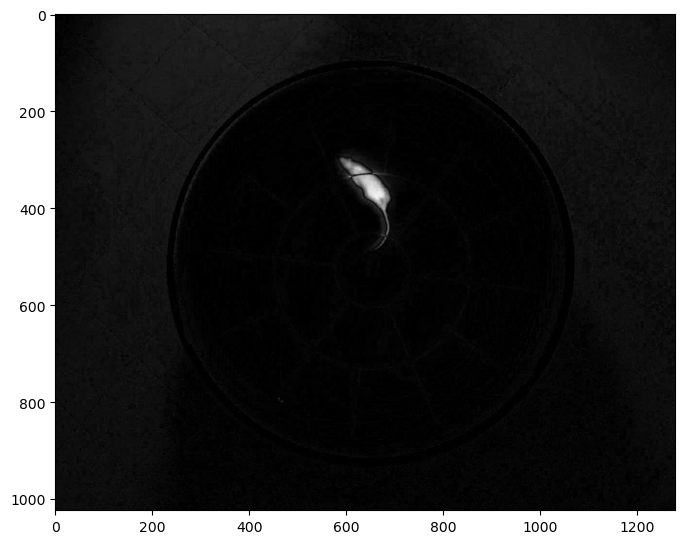

In [44]:
frame = cv2.absdiff(vdata_arr[0], median_frame)
plt.figure(figsize = (8, 8))
plt.imshow(frame, cmap='gray')
#plt.axis("off")
plt.show()

__Step 2. Image filtering__

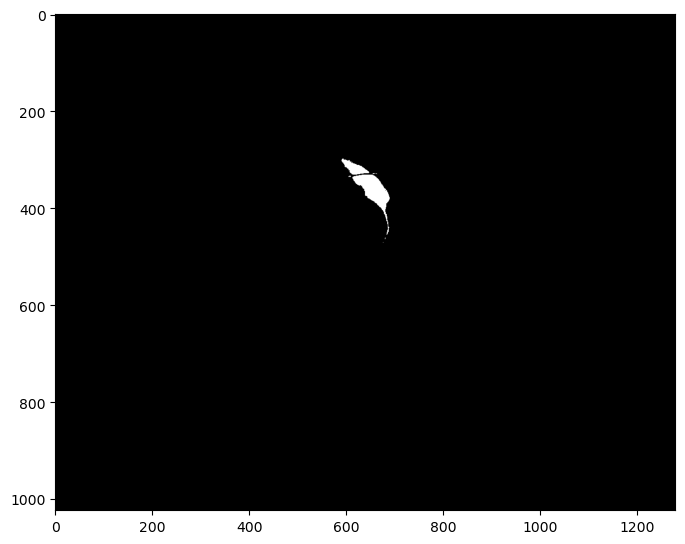

In [45]:
ret, frame_filtr = cv2.threshold(frame, 30, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize = (8, 8))
plt.imshow(frame_filtr, cmap='gray')
#plt.axis("off")
plt.show()

__Step 3. Heatmap__

In [46]:
def get_heatmapF(frames, median):
    len_frames = len(frames)
    print(len_frames)
    frame_h, frame_w = frames[0].shape
    total_map = np.zeros((frame_h, frame_w), dtype=np.float64) #accum_image = np.zeros((height, width), np.uint8)
    median_rgb = cv2.cvtColor(median, cv2.COLOR_GRAY2RGB)

    for i, frame in enumerate(frames):
       # if(i>50):
        frame = cv2.absdiff(frame, median)
            
        ret, frame = cv2.threshold(frame, 30, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        total_map += frame
    total_max = np.max(total_map)
    heatmap = total_map.astype(np.float64) * (255/ total_max)
    heatmap = cv2.applyColorMap(heatmap.astype(np.uint8), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
 #   heatmap =  heatmap  # median_rgb / 2 
  
    return heatmap, total_map

In [47]:
heatmap, total_map =get_heatmapF(vdata_arr, median_frame)

2500


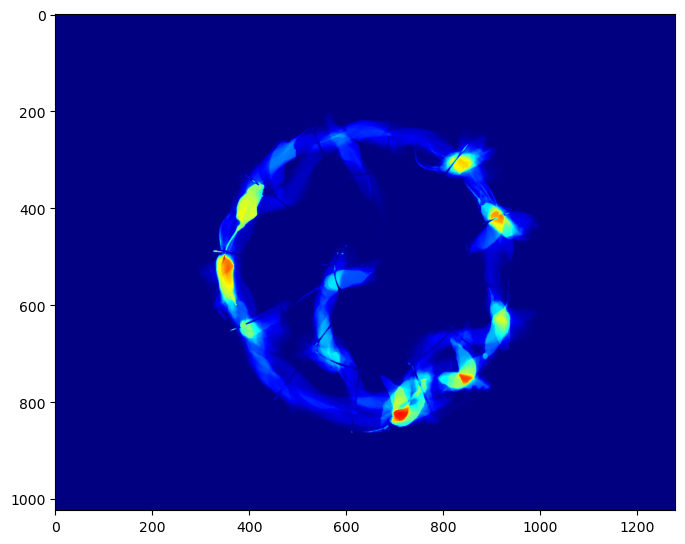

In [48]:
plt.figure(figsize = (8, 8))
plt.imshow(heatmap)

__Resulting heat map image__

In [49]:
median_rgb = cv2.cvtColor(median_frame, cv2.COLOR_GRAY2RGB)

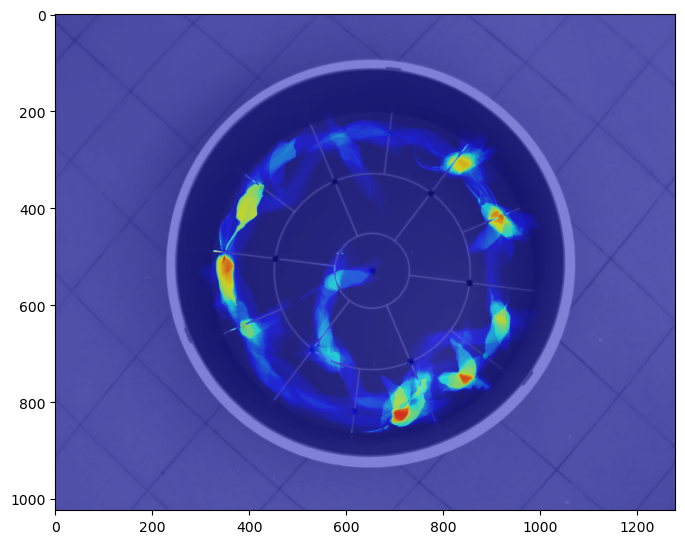

In [50]:
result_overlay2 = cv2.addWeighted(median_rgb , 0.5, heatmap, 0.7, 0)
plt.figure(figsize = (8, 8))
plt.imshow(result_overlay2)